# Do you want to know what makes a student good at Math?
# Do you like looking at beautiful graphs and visualizations?
***If so then this Kernel is perfect for you!***

* We aim to identify, using data visualizaton, key features that affects students performance in the third math exam. To have a look at the descriptions of the attributes, check out https://www.kaggle.com/janiobachmann/math-students
* Data collected during the 2005-2006 academic year from the Alentejo region from Portugal from two schools.
* The attributes such as math marks in year 1, year 2 was collected from the school records. 
* Social/economic attributes was collected by making the students fill in a questionnaire.

* Note that the authors of the 'Using Data Mining to Predict Secondary School Student Performance' paper have collected the data. They have been formaly cited below. 
* They have also built a fairly accurate model for prediction. Hence we shall not address the issue of prediction here. 

Import the required libraries

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/math-students/student-mat.csv


Get data

In [2]:
url='/kaggle/input/math-students/student-mat.csv'
df=pd.read_csv(url)


Check out the first few rows of the data

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Elementary statistics associated with the data

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Presence of null objects and datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# **Feature Engineering**

Categorical Output- 
Pass Vs Fail 
* A student fails if he/she gets below 10

In [6]:
def pass_classify(row):
    if row.G3>=10:
        return 1
    else:
        return 0
    
pass_=df.apply(pass_classify,axis='columns')
#print(pass_fail)
print(pass_.value_counts())

1    265
0    130
dtype: int64


Categorical Output-
Grades: A,B,C,D,F
* The grading system is as given in the code below

In [7]:
def grade_classify(row):
    if row.G3>=16:
        return 'A'
    elif row.G3>=14:
        return 'B'
    elif row.G3>=12:
        return 'C'
    elif row.G3>=10:
        return 'D'
    else:
        return 'F'
    

grades=df.apply(grade_classify,axis='columns')
print(grades.value_counts())


F    130
D    103
C     62
B     60
A     40
dtype: int64


Helper function to find percentage of people passed and grade percentage

In [8]:
def get_percent(col):
    return (col.value_counts()/col.value_counts().sum())*100


In [9]:
pass_percent=get_percent(pass_)
print(pass_percent)

1    67.088608
0    32.911392
dtype: float64


In [10]:
grade_percent=get_percent(grades)
print(grade_percent)

F    32.911392
D    26.075949
C    15.696203
B    15.189873
A    10.126582
dtype: float64


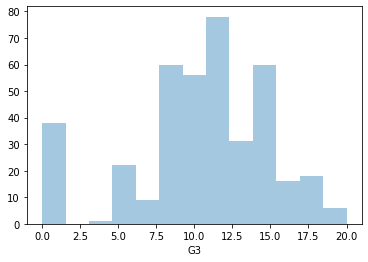

In [11]:
sns.distplot(a=df['G3'], kde=False)

* 1/3rd of the people have failed in the exam, which is quite surprising. 
* More than half the people have recieved a D and a F grade

In [12]:
df['grades']=grades
print(grades)

0      F
1      F
2      D
3      B
4      D
      ..
390    F
391    A
392    F
393    D
394    F
Length: 395, dtype: object


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# **Cramer's V correlation matrix**

We use the Cramer's V correlation matrix to identify correlation b/w categorical features. 

1. We firstly remove all the continous attributes from our dataframe

In [14]:
df_cat = df[[i for i in df.columns if i not in ('G1','G2','G3','absences')]]
df_cat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,D
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,D


2. Label Encoding of the categorical features is then done

In [15]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in df_cat.columns :
  data_encoded[i]=label.fit_transform(df_cat[i])

In [16]:
data_encoded.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,grades
0,0,0,3,1,0,0,4,4,0,4,...,1,0,0,3,2,3,0,0,2,4
1,0,0,2,1,0,1,1,1,0,2,...,1,1,0,4,2,2,0,0,2,4
2,0,0,0,1,1,1,1,1,0,2,...,1,1,0,3,2,1,1,2,2,3
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,2,1,1,0,0,4,1
4,0,0,1,1,0,1,3,3,2,2,...,1,0,0,3,2,1,0,1,4,3


3. Building of the Cramer's V function

In [17]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

4. Building of the matrix

In [18]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_var = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



df_var

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,grades
school,0.98,0.00,0.19,0.07,0.00,0.00,0.05,0.01,0.01,0.02,...,0.00,0.02,0.00,0.01,0.01,0.01,0.03,0.03,0.01,0.01
sex,0.00,0.99,0.02,0.00,0.01,0.00,0.01,0.01,0.04,0.01,...,0.02,0.00,0.01,0.01,0.07,0.01,0.08,0.09,0.02,0.02
age,0.19,0.02,1.00,0.05,0.01,0.03,0.02,0.02,0.02,0.02,...,0.08,0.04,0.04,0.01,0.02,0.02,0.05,0.03,0.02,0.02
address,0.07,0.00,0.05,0.99,0.00,0.00,0.03,0.02,0.03,0.01,...,0.00,0.04,0.00,0.00,0.01,0.02,0.02,0.01,0.01,0.02
famsize,0.00,0.01,0.01,0.00,0.99,0.02,0.01,0.01,0.01,0.01,...,0.00,0.00,0.00,0.00,0.01,0.00,0.03,0.01,0.00,0.01
Pstatus,0.00,0.00,0.03,0.00,0.02,0.97,0.03,0.01,0.01,0.01,...,0.00,0.00,0.00,0.01,0.02,0.01,0.01,0.02,0.01,0.01
Medu,0.05,0.01,0.02,0.03,0.01,0.03,1.00,0.13,0.14,0.03,...,0.04,0.05,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02
Fedu,0.01,0.01,0.02,0.02,0.01,0.01,0.13,1.00,0.04,0.07,...,0.04,0.02,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01
Mjob,0.01,0.04,0.02,0.03,0.01,0.01,0.14,0.04,1.00,0.05,...,0.02,0.07,0.01,0.01,0.02,0.01,0.01,0.00,0.01,0.02
Fjob,0.02,0.01,0.02,0.01,0.01,0.01,0.03,0.07,0.05,1.00,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


5. Add a heatmap to the matrix

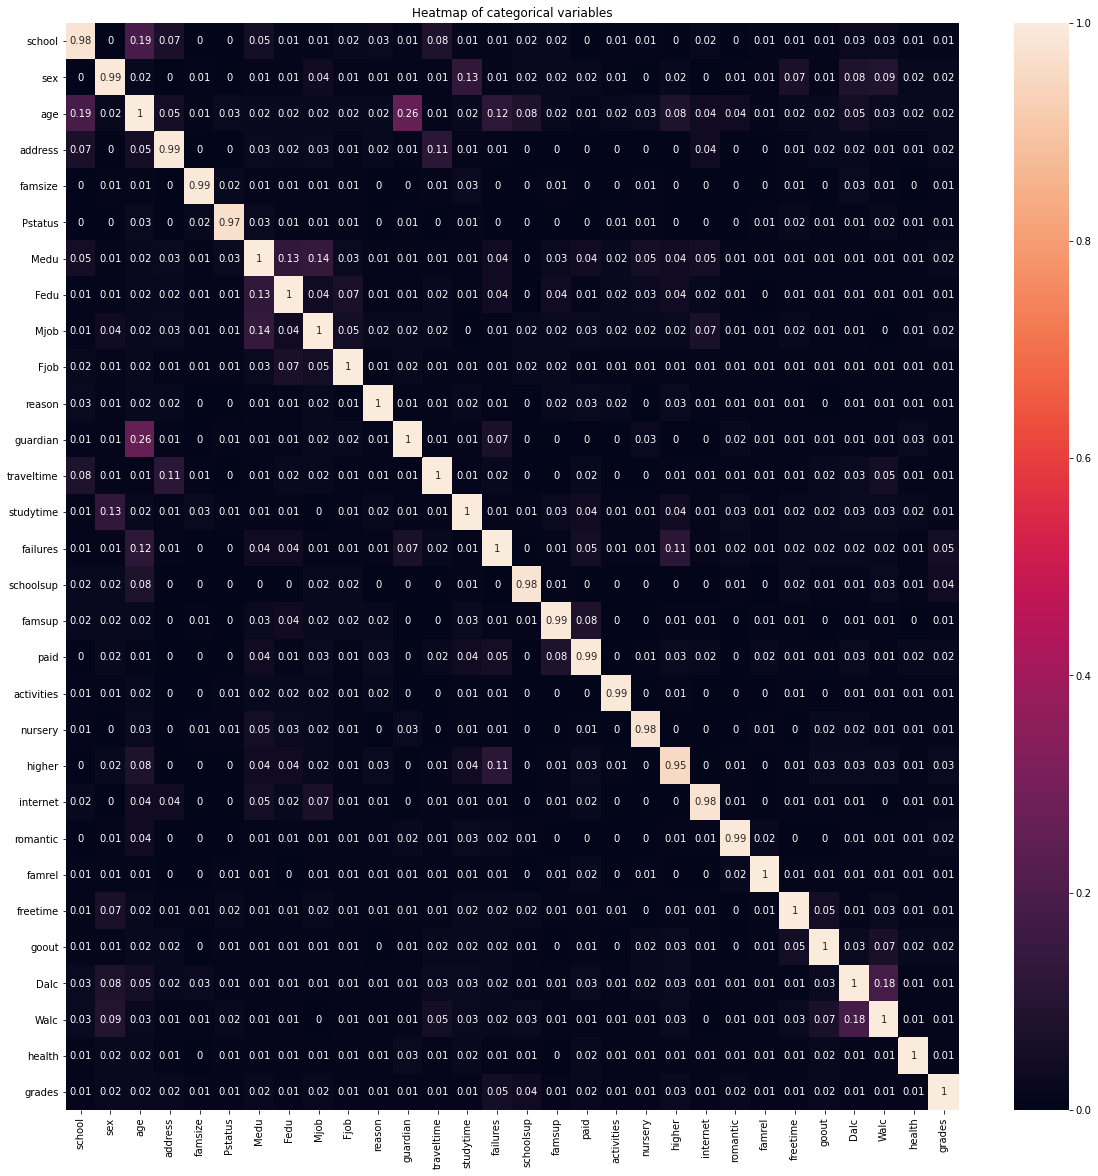

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.title("Heatmap of categorical variables")
sns.heatmap(data=df_var,vmin=0, vmax=1,annot=True)

plt.show()


* We see that there is almost a negligible relationship with all the categorical attributes and grades

# **Scatter Plots**

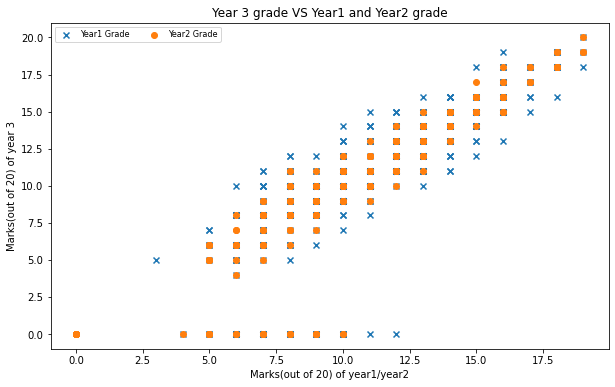

In [20]:
x1=df['G1']
x2=df['G2']
y=df['G3']
plt.figure(figsize=(10,6))
plt.title("Year 3 grade VS Year1 and Year2 grade")
g1=plt.scatter(x1,y,marker='x')
g2=plt.scatter(x2,y,marker='o')
plt.legend((g1, g2),
           ('Year1 Grade', 'Year2 Grade'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.xlabel("Marks(out of 20) of year1/year2")
plt.ylabel("Marks(out of 20) of year 3")
plt.show() 



* The previous grades G1 and G2 seem to be positively linearly correlated to G3

# **No of absent days VS Marks scatter plot**

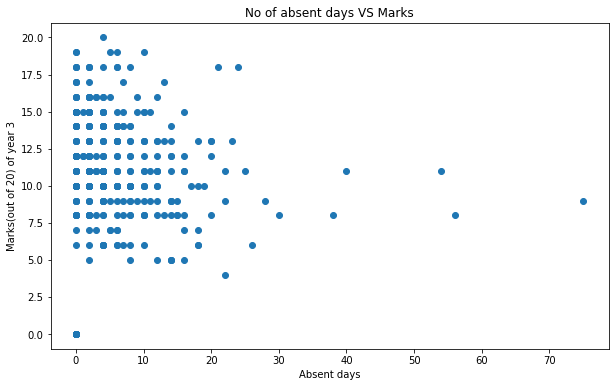

In [21]:
plt.figure(figsize=(10,6))
plt.title("No of absent days VS Marks")
plt.scatter(df["absences"],df["G3"])

plt.ylabel("Marks(out of 20) of year 3")
plt.xlabel("Absent days")
plt.show()

* There doesn't seem to be much a relation with no of absent days and marks. However since most students have taken only between 0 to 10 days of leave, we might not have enough information to conclude much

# **Boxplots**

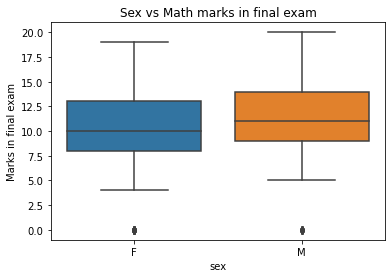

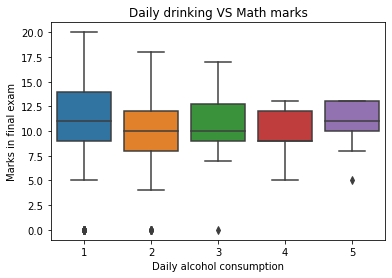

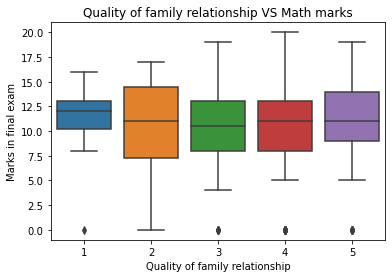

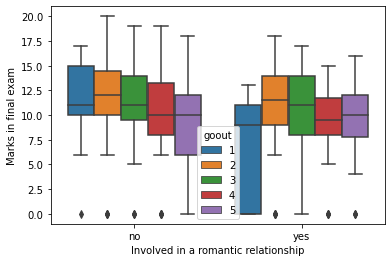

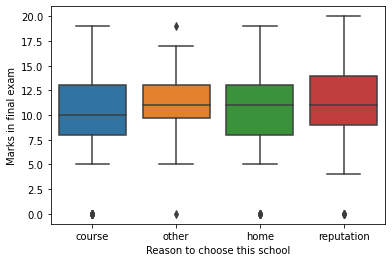

In [22]:
#plt.figure(figsize=(12,7))
plt.title("Sex vs Math marks in final exam")
ax = sns.boxplot(x="sex", y="G3", data=df)
plt.ylabel("Marks in final exam")
plt.show()


plt.title("Daily drinking VS Math marks")
ax = sns.boxplot(x="Dalc", y="G3",data=df)
plt.xlabel("Daily alcohol consumption")
plt.ylabel("Marks in final exam")
plt.show()

plt.title("Quality of family relationship VS Math marks")
ax=sns.boxplot(x="famrel",y="G3",data=df)
plt.ylabel("Marks in final exam")
plt.xlabel("Quality of family relationship")
plt.show()


ax = sns.boxplot(x="romantic", y="G3", hue="goout",
                 data=df)
plt.ylabel("Marks in final exam")
plt.xlabel("Involved in a romantic relationship")
plt.show()


ax=sns.boxplot(x="reason",y="G3",data=df)
plt.ylabel("Marks in final exam")
plt.xlabel("Reason to choose this school")
plt.show()





* The boxplots don't give much information as the categorical factors don't seem to be correlated with the final exam marks

# 2D KDE plots

We have a look at a 2D KDE plot between marks in the final exam vs the first/second exam respectively

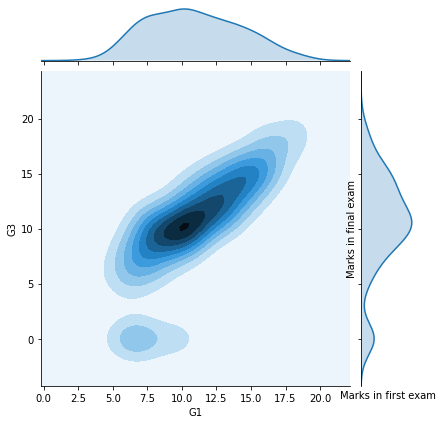

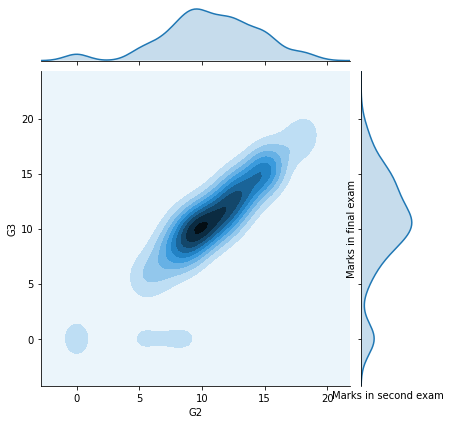

In [23]:

sns.jointplot(x=df['G1'], y=df['G3'], kind="kde")
#plt.title("2D KDE plot b/w marks in first exam vs marks in final exam")
plt.xlabel('Marks in first exam')
plt.ylabel('Marks in final exam')
plt.show()



sns.jointplot(x=df['G2'], y=df['G3'], kind="kde")
#plt.title("2D KDE plot b/w marks in second exam vs marks in final exam")
plt.xlabel('Marks in second exam')
plt.ylabel('Marks in final exam')
plt.show()


* This shows in a very beautiful manner the linear relationship present b/w the marks in final exam VS the marks in the first/second exams respectively
* Also the data is centered around (10,10) in both plots

**Converting Categorical data to Numerical data**

We want to use label encoding for ONLY those labels in which the labels can be compared to one another. For example if the labels were short and tall, we would assign 0 to short and 1 to tall

We label encode the 'romantic' attribute('romantic'='yes' if student is in a romantic relationship, else it is 'no'). We want to assign 0 to 'no' and 1 to 'yes'

In [24]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in columns

romantic_no=label_encoder.fit_transform(df['romantic'])

print(romantic_no[0])
print(df['romantic'][0])


0
no


Our assignment, by luck turned out to be correct. We could have gotten 1 to be assigned to no instead of 0, then we should have modified the labelling

In [25]:
df['romantic']=romantic_no

Converting more categorical labels to numeric(by checking if encoding is right)

In [26]:
famsize_no=label_encoder.fit_transform(df['famsize'])
df['famsize']=1-famsize_no

activities_no=label_encoder.fit_transform(df['activities'])
df['activites']=activities_no

df['Pstatus']=label_encoder.fit_transform(df['Pstatus'])
df['nursery']=label_encoder.fit_transform(df['nursery'])
df['internet']=label_encoder.fit_transform(df['internet'])
df['higher']=label_encoder.fit_transform(df['higher'])
df['schoolsup']=label_encoder.fit_transform(df['schoolsup'])
df['famsup']=label_encoder.fit_transform(df['famsup'])
df['paid']=label_encoder.fit_transform(df['paid'])


In [27]:
print(df.head())

  school sex  age address  famsize  Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U        1        0     4     4  at_home   teacher   
1     GP   F   17       U        1        1     1     1  at_home     other   
2     GP   F   15       U        0        1     1     1  at_home     other   
3     GP   F   15       U        1        1     4     2   health  services   
4     GP   F   16       U        1        1     3     3    other     other   

   ... goout Dalc  Walc  health  absences  G1  G2  G3 grades  activites  
0  ...     4    1     1       3         6   5   6   6      F          0  
1  ...     3    1     1       3         4   5   5   6      F          0  
2  ...     2    2     3       3        10   7   8  10      D          0  
3  ...     2    1     1       5         2  15  14  15      B          1  
4  ...     2    1     2       5         4   6  10  10      D          0  

[5 rows x 35 columns]


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    int64 
 5   Pstatus     395 non-null    int64 
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    int64 
 16  famsup      395 non-null    int64 
 17  paid        395 non-null    int64 
 18  activities  395 non-null    object
 19  nursery     395 non-null    int64 
 20  higher    

# **Bar Plots**

* We first group the data based on the grades obtained by the student. 
* We wish to see whether we can predict any attribute of the student given their grade.

In [29]:
grouped_df=df.groupby('grades')
print(grouped_df['freetime','famrel','goout','romantic','Pstatus','activities','paid'].mean())


        freetime    famrel     goout  romantic   Pstatus      paid
grades                                                            
A       3.350000  4.075000  2.950000  0.225000  0.850000  0.325000
B       3.216667  4.033333  2.950000  0.283333  0.933333  0.533333
C       3.241935  3.806452  2.919355  0.419355  0.887097  0.467742
D       3.165049  4.000000  3.009709  0.271845  0.873786  0.543689
F       3.261538  3.884615  3.400000  0.400000  0.915385  0.392308


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


# **Relationship Quotient Vs Grade**

Relationship Quotient of a set of students is defined as the average no of students in that set in a romantic relationship

Text(0.5, 0, 'Grade')

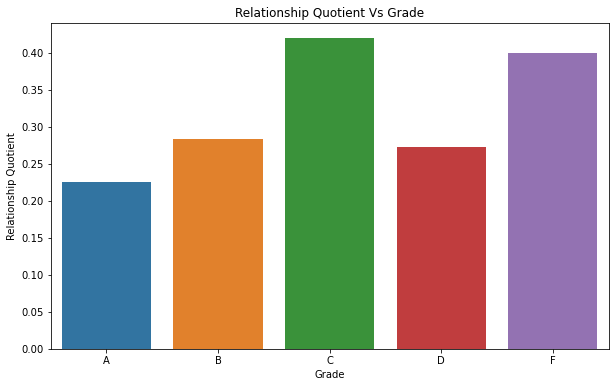

In [30]:
plt.figure(figsize=(10,6))
plt.title("Relationship Quotient Vs Grade")
sns.barplot(x=["A","B","C","D","F"], y=grouped_df['romantic'].mean())
plt.ylabel("Relationship Quotient")
plt.xlabel("Grade")

* The students that get A grade seem to be less likely to be in a romantic relationship than others

# **Free Time Vs Grade**

Text(0.5, 0, 'Grade')

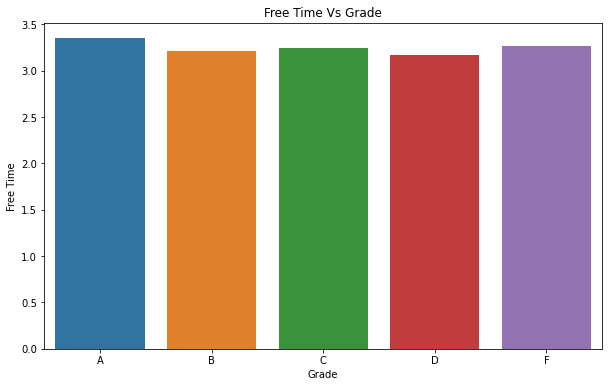

In [31]:
plt.figure(figsize=(10,6))
plt.title("Free Time Vs Grade")
sns.barplot(x=["A","B","C","D","F"], y=grouped_df['freetime'].mean())
plt.ylabel("Free Time")
plt.xlabel("Grade")

* There doesn't seem to be any relationship amongst the variables (This was what we concluded after observing the heat map)

# **Go out Vs Grade**

Text(0.5, 0, 'Grade')

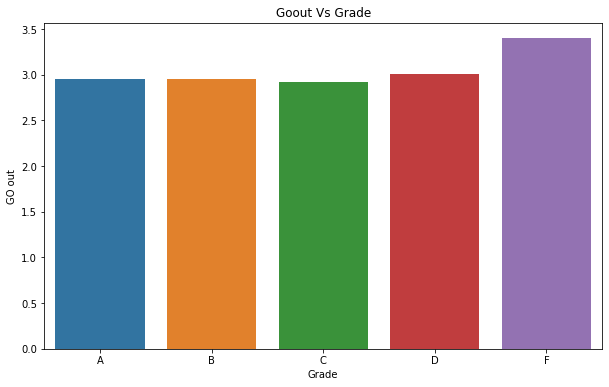

In [32]:
plt.figure(figsize=(10,6))
plt.title("Goout Vs Grade")
sns.barplot(x=["A","B","C","D","F"], y=grouped_df['goout'].mean())
plt.ylabel("GO out")
plt.xlabel("Grade")

* There doesn't seem to be any relationship amongst the variables (This was what we concluded after observing the heat map)

# Conclusions from Exploratory Data Analysis:
1. Most categorical features don't seem to affect student's performance in exams,when compared to the continous attributes.This is quite surprising, because apriori one would assume social factors such as quality of family relationship/ whether the student goes to paid tuitons or not,etc would have played a big factor
2. The categorical attributes also don't seem to be correlated with one another. 
3. The most important factors which determine student's performance in the final math exam seem to be student's previous performance in the previous 2 exams


# Citation:
1. P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
2. Cramer's V Correlation matrix code -: https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix


# Things to Improve/build on:
* Use data from different places around the world and different age groups(eg pre-school/school/university life) to check if the conclusions we derieved from this dataset are universal truths


